In [1]:
import pymc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Some data
n = 5 * np.ones(4, dtype=int)
x = np.array([-.86, -.3, -.05, .73])

# Priors on unknown parameters
alpha = pymc.Normal('alpha', mu=0, tau=.01)
beta = pymc.Normal('beta', mu=0, tau=.01)

# Arbitrary deterministic function of parameters
@pymc.deterministic
def theta(a=alpha, b=beta):
    """theta = logit^{-1}(a+b)"""
    return pymc.invlogit(a + b * x)

# Binomial likelihood for data
d = pymc.Binomial('d', n=n, p=theta, value=np.array([0., 1., 3., 5.]),
                  observed=True)

In [ ]:
from scipy.stats import beta
a, b = 1, 80

x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),          'r-', lw=5, alpha=0.6, label='beta pdf')
plt.yscale('log')

In [8]:
# data
ploidy = 4
total_depth = 16
a1_depth = 12
# chance you got it WRONG
epsilon = 0.01

# genotype is count of a1
a1 = pymc.DiscreteUniform('a1_genotype', 0, ploidy)
# put a prior on the error rate
#epsilon = pymc.Beta('epsilon', 1, 80)
# population freq
#pop_freq = pymc.Beta('pop_freq', 1, 1)

# probability each read is a1
@pymc.stochastic
def p1_ind(value = .5 ):
    


p1_ind = a1/np.float(ploidy)
# account for error
p1_ind = p1_ind - (p1_ind*epsilon) + (1-p1_ind)*epsilon

d = pymc.Binomial('d', n=total_depth, p = p1_ind, 
                  value = 3,
                  observed = True)

In [9]:
model1 = dict(a1=a1, d=d, epsilon=epsilon, p1_ind=p1_ind)
S = pymc.MCMC(model1)
S.sample(iter=100000, burn=500)

 [-----------------100%-----------------] 100000 of 100000 complete in 9.8 sec

Plotting a1_genotype


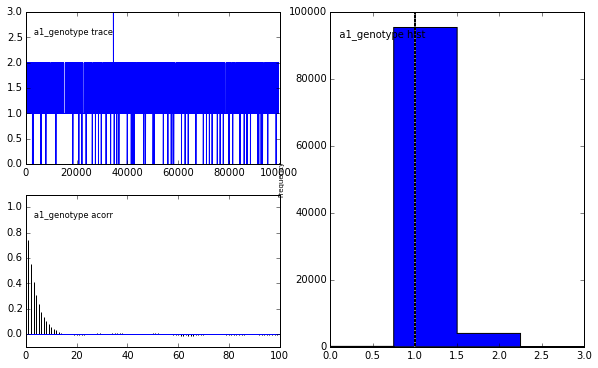

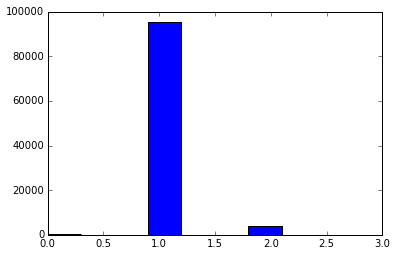

KeyError: 'p1_ind'

In [10]:
pymc.Matplot.plot(S)
plt.show()
plt.hist(S.trace('a1_genotype')[:])
plt.show()
plt.hist(S.trace('p1_ind')[:])
plt.show()
plt.hist(S.trace('epsilon')[:])
plt.show()

In [15]:
# data
ploidy = 4
total_depth = 16
a1_depth = 8
# chance you got it WRONG
epsilon = 0.01

@pymc.stochastic(observed=False)
def a1(value=1, ploidy = ploidy, pop_freq = pop_freq):
    return pymc.distributions.binomial_like(value, n=ploidy, p=pop_freq)

# genotype is count of a1
#a1 = pymc.Binomial('a1_genotype', ploiyd, pop_freq)
# put a prior on the error rate
#epsilon = pymc.Beta('epsilon', 1, 80)
# population freq
#pop_freq = pymc.Beta('pop_freq', 1, 1)

@pymc.deterministic
def a1(value = .5, ploidy = ploidy, pop_freq = pop_freq):
    p1_ind = a1/np.float(ploidy)
    # account for error
    p1_ind = p1_ind - (p1_ind*epsilon) + (1-p1_ind)*epsilon
    return p1_ind

# probability each read is a1
p1_ind = a1/np.float(ploidy)
# account for error
p1_ind = p1_ind - (p1_ind*epsilon) + (1-p1_ind)*epsilon


d = pymc.Binomial('d', n=total_depth[1], p = p1_ind, 
                  value = ploidy/2,
                  observed = True)

model1 = dict(a1=a1, d=d, epsilon=epsilon, p1_ind=p1_ind)
S = pymc.MCMC(model1)
S.sample(iter=100000, burn=500)

SyntaxError: invalid syntax (<ipython-input-15-24d8d231d49b>, line 20)

In [ ]:
pymc.Matplot.plot(S)
plt.show()
plt.hist(S.trace('a1_genotype')[:])
plt.show()
plt.hist(S.trace('p1_ind')[:])
plt.show()
plt.hist(S.trace('epsilon')[:])
plt.show()

In [ ]:
geno_dat = {'ploidy': 4,
               'total_depth': 8,
               'a1_depth': 3}